In [1]:
%matplotlib inline

import OnePy as op
from OnePy.builtin_module.recorders.stock_recorder import StockRecorder
from OnePy.custom_module.cleaner_sma import SMA


class SmaStrategy(op.StrategyBase):

    def __init__(self):

        super().__init__()
        self.sma1 = SMA(3, 40).calculate
        self.sma2 = SMA(5, 40).calculate

        self.sma3 = SMA(15, 40).calculate
        self.sma4 = SMA(30, 60).calculate

    def handle_bar(self):
        if self.sma1('000001') > self.sma2('000001'):
            self.buy(100, '000001', takeprofit=15,
                     stoploss=100, trailingstop_pct=0.1)
        else:
            self.sell(100, '000001')

        if self.sma3('000001') < self.sma4('000001'):
            self.short_sell(100, '000001', takeprofit=15,
                            stoploss=100, trailingstop_pct=0.1)
        else:
            self.short_cover(100, '000001')
            
# 运行MongodbReader，请先运行examples中的tushare_to_MongoDB.py
op.data_readers.MongodbReader(
    database='tushare', collection='000001', ticker='000001',
    fromdate='2017-05-25', todate='2018-03-09')

SmaStrategy()

op.RiskManagerBase()
op.BrokerBase()

StockRecorder().set_setting(initial_cash=100000,
                            comm=1, comm_pct=None, margin_rate=0.1)
go = op.OnePiece()
# go.logger.set_info(file=False)
go.sunny()
# go.output.show_setting()
# go.output.plot('000001')


+--------------------------+
| Final_Value  | $99805.90 |
| Total_return | -0.19410% |
| Max_Drawdown | 0.49000%  |
| Duration     |     359.0 |
| Sharpe_Ratio | -0.38212  |
+--------------------------+


In [4]:
go.output.show_setting()

+--------------------+
| readers_1 | 000001 |
+--------------------+
+--------------------+
| cleaners_1 | SMA_1 |
| cleaners_2 | SMA_2 |
| cleaners_3 | SMA_3 |
| cleaners_4 | SMA_4 |
+--------------------+
+--------------------------+
| strategy_1 | SmaStrategy |
+--------------------------+
+------------------------+
| brokers_1 | BrokerBase |
+------------------------+
+-----------------------------------+
| risk_managers_1 | RiskManagerBase |
+-----------------------------------+
+-----------------------------+
| recorders_1 | StockRecorder |
+-----------------------------+


In [13]:
go.output.trade_log()

,entry_date,entry_price,entry_type,exit_date,exit_price,exit_type,pl_points,re_pnl,size,ticker
0,2017-05-25,8.947,Market Buy,2017-06-02,9.097,Limit Sell,0.150,15.0,100,000001
1,2017-05-26,8.967,Market Buy,2017-06-02,9.117,Limit Sell,0.150,15.0,100,000001
2,2017-05-25,8.947,Market Short_sell,2017-06-02,8.997,Market Short_cover,-0.050,-5.0,100,000001
3,2017-05-31,9.066,Market Short_sell,2017-06-05,8.916,Limit Short_cover,0.150,15.0,100,000001
4,2017-06-01,9.046,Market Short_sell,2017-06-05,8.896,Limit Short_cover,0.150,15.0,100,000001
5,2017-05-31,9.066,Market Buy,2017-06-05,8.879,Market Sell,-0.187,-18.7,100,000001
6,2017-05-26,8.967,Market Short_sell,2017-06-05,8.879,Market Short_cover,0.088,8.8,100,000001
7,2017-06-01,9.046,Market Buy,2017-06-06,8.888,Market Sell,-0.158,-15.8,100,000001
8,2017-06-02,8.997,Market Buy,2017-06-07,8.977,Market Sell,-0.020,-2.0,100,000001
9,2017-06-08,9.016,Market Buy,2017-06-13,8.987,Market Sell,-0.029,-2.9,100,000001


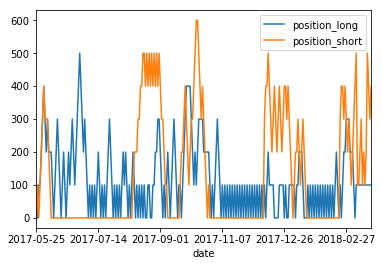

In [3]:
go.env.gvar.position.plot('000001')

In [5]:
# 一系列回测结果
go.env.gvar.cash.dataframe()
# go.env.gvar.balance
# go.env.gvar.holding_pnl
# go.env.gvar.market_value
# go.env.gvar.frozen_cash
# go.env.gvar.commission

,cash
date,
2017-05-25,100000.000000
2017-05-25,100000.000000
2017-05-25,99104.300000
2017-05-25,98119.130000
2017-05-26,98119.130000
2017-05-26,97217.230000
2017-05-26,96229.860000
2017-05-31,96229.860000
2017-05-31,95280.680000


In [12]:
# 一系列原始order列表
go.env.orders_mkt_original[0]

In [9]:
# 一系列原始signals列表
go.env.signals_normal[0]

Signal(size=100, ticker='000001', datetime='2017-05-25', takeprofit=15, takeprofit_pct=None, stoploss=100, stoploss_pct=None, trailingstop=None, trailingstop_pct=0.1, price=None, price_pct=None, execute_price=None, first_cur_price=None, action_type=<ActionType.Buy: 'Buy'>, order_type=None, mkt_id=None, id=1)

In [10]:
# 一系列原始触发挂单的signals列表
go.env.signals_trigger[0]

SignalByTrigger(size=100, ticker='000001', datetime='2017-06-02', takeprofit=None, takeprofit_pct=None, stoploss=None, stoploss_pct=None, trailingstop=None, trailingstop_pct=None, price=None, price_pct=None, execute_price=9.097, first_cur_price=8.947, action_type=<ActionType.Sell: 'Sell'>, order_type=<OrderType.Limit: 'Limit'>, mkt_id=1, id=1, exec_type=None, trigger_key=None)